In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# import machine learning models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [3]:
# load the file
df = pd.read_csv("data/final_test.csv")

<AxesSubplot:>

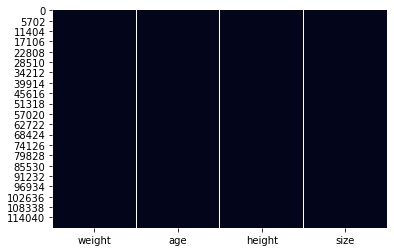

In [4]:
# show how much data is null
sns.heatmap(df.isnull(), cbar = False)

In [5]:
# clean the data
df = df.dropna()

In [6]:
# assign the dependent and independent variables
y = df.pop("size")
X = df

In [7]:
# remove zeroes and turn data into int for simplicity
df.loc[(df!=0).any(1)]
df = df.astype("int")

In [8]:
# prepare the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [9]:
ada = AdaBoostClassifier()

ada.fit(X_train, y_train)

AdaBoostClassifier()

In [14]:
prediction = ada.predict(X_test)

out_df = pd.DataFrame()

out_df["sizes"] = np.unique(prediction)
out_df["count_prediction"] = [(prediction == size).sum() for size in out_df["sizes"]]
out_df["count_test"] = [(y_test == size).sum() for size in out_df["sizes"]]

In [15]:
# Now let's order the data nicely and display it
order = {"XXS":1, "S":2, "M":3, "L":4, "XL":5, "XXL":6, "XXXL":7}
out_df["weights"] = [order[x] for x in out_df["sizes"]]
out_df.sort_values("weights", inplace = True)

<BarContainer object of 7 artists>

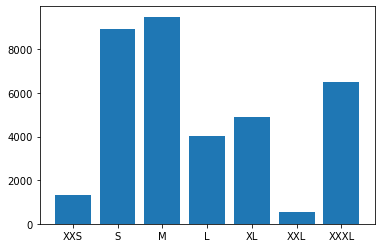

In [16]:
plt.bar(out_df["sizes"], out_df["count_prediction"])

<BarContainer object of 7 artists>

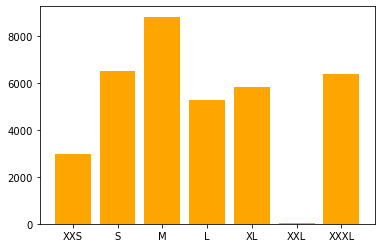

In [17]:
plt.bar(out_df["sizes"], out_df["count_test"], color = "orange")